In [1]:
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE
from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
import gym

# cartpole = VectorizedEnvWrapper(gym.make("CartPole-v0"), num_envs=8)
# categorical = CategoricalPolicy(cartpole, lr=1e-1)
# value_estimator = ValueEstimator(cartpole, lr=1e-2)
# totals_ppo = PPO(cartpole, categorical, value_estimator, epochs=100)
# categorical = CategoricalPolicy(cartpole, lr=1e-1)
# value_estimator = ValueEstimator(cartpole, lr=1e-2)
# totals_a2c = A2C(cartpole, categorical, value_estimator, epochs=100)
# categorical = CategoricalPolicy(cartpole, lr=1e-1)
# value_estimator = ValueEstimator(cartpole, lr=1e-2)
# totals_pg = REINFORCE(cartpole, categorical, epochs=100)

In [2]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})


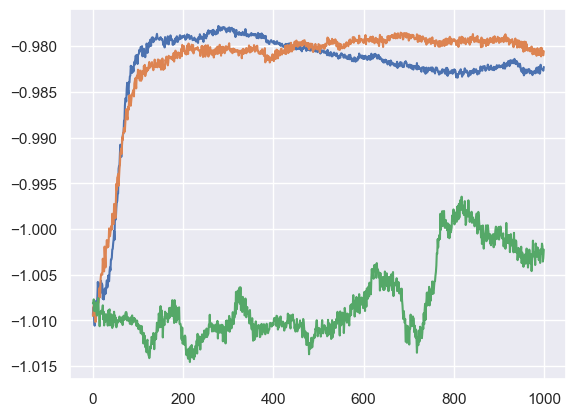

In [4]:
from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym


energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
totals_ppo = PPO(energy_management, categorical, value_estimator, epochs=1000, gamma = 1, T = 720, kl_threshold=1e-1)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
totals_a2c = A2C(energy_management, categorical, value_estimator, epochs=1000, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
totals_reinforce = REINFORCE(energy_management, categorical, epochs=1000, gamma = 1, T = 720)

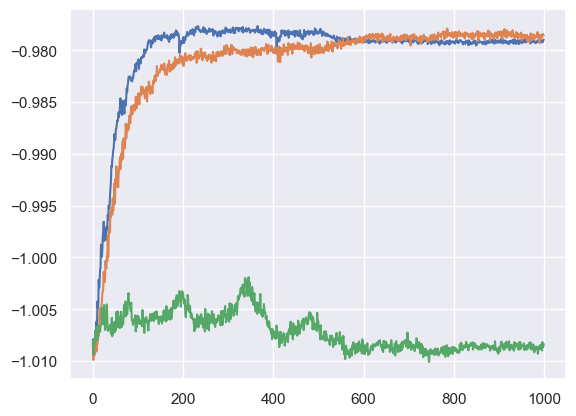

In [6]:
from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym


energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
totals_ppo = PPO(energy_management, categorical, value_estimator, epochs=1000, gamma = 1, T = 720, kl_threshold=1e-2)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
totals_a2c = A2C(energy_management, categorical, value_estimator, epochs=1000, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
totals_reinforce = REINFORCE(energy_management, categorical, epochs=1000, gamma = 1, T = 720)

import seaborn as sns
sns.lineplot(x=range(len(totals_ppo)), y=totals_ppo, label="PPO")
sns.lineplot(x=range(len(totals_a2c)), y=totals_a2c, label="A2C")
sns.lineplot(x=range(len(totals_reinforce)), y=totals_reinforce, label="REINFORCE")

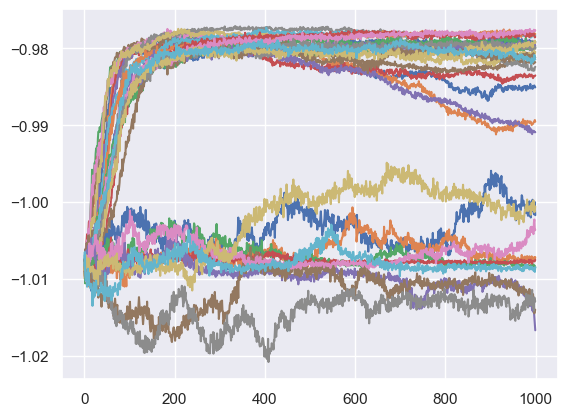

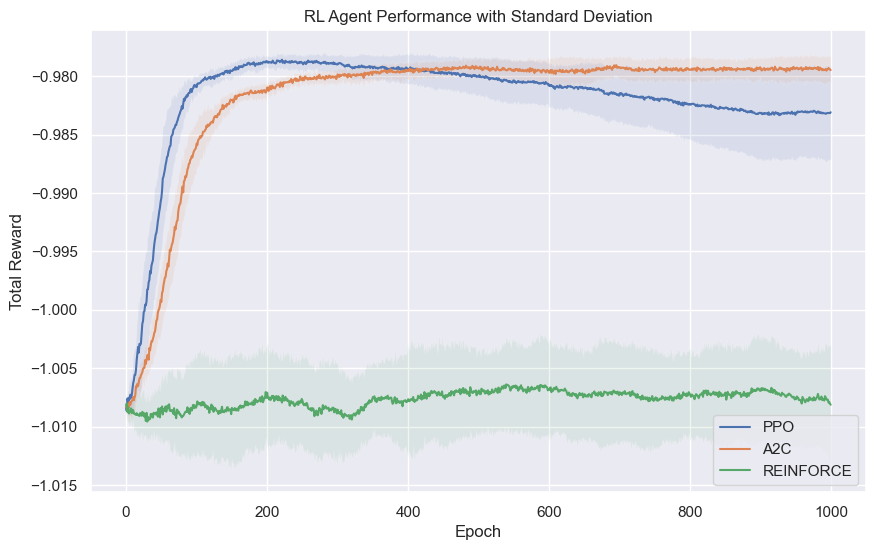

: 

In [43]:
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE

# Assuming the implementations of A2C, PPO, REINFORCE accept an argument to return total rewards per epoch

def run_experiment(agent_function, energy_management, num_runs=10, **kwargs):
    all_totals = []
    for _ in range(num_runs):
        categorical = CategoricalPolicy(energy_management, lr=1e-2)
        if agent_function in [PPO, A2C]:
            value_estimator = ValueEstimator(energy_management, lr=1e-2)
            totals = agent_function(energy_management, categorical, value_estimator, **kwargs)
        else: # REINFORCE
            totals = agent_function(energy_management, categorical, **kwargs)
        all_totals.append(totals)
    return np.array(all_totals)

def plot_results(results, labels):
    plt.figure(figsize=(10, 6))  # Increase figure size for better readability
    for label, data in zip(labels, results):
        means = np.mean(data, axis=0)
        stds = np.std(data, axis=0)
        epochs = range(data.shape[1])  # Corrected to data.shape[1] for dynamic length
        plt.fill_between(epochs, means - stds, means + stds, alpha=0.1)
        plt.plot(epochs, means, label=label)
    
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Total Reward')
    plt.title('RL Agent Performance with Standard Deviation')
    plt.grid(True)  # Add grid for better readability
    plt.show()

num_runs = 10  # Number of runs for averaging
num_envs = 8  # Number of environments for vectorization

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=num_envs)

results = []
results.append(run_experiment(PPO, energy_management, epochs=1000, gamma=1, T=720, kl_threshold=1e-2, num_runs=num_runs))
results.append(run_experiment(A2C, energy_management, epochs=1000, gamma=1, T=720, num_runs=num_runs))
results.append(run_experiment(REINFORCE, energy_management, epochs=1000, gamma=1, T=720, num_runs=num_runs))

plot_results(results, ['PPO', 'A2C', 'REINFORCE'])
# plot_results(results, ['PPO'])


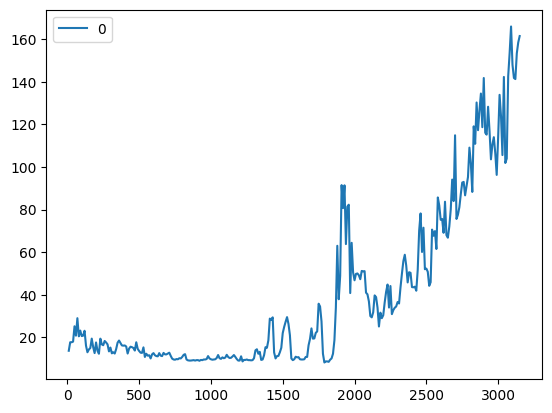

In [2]:
# run DQN on cartpole
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from agents.dqn import DeepQLearner, DQN
from learning_utils.replay_buffer import ReplayBuffer

env = VectorizedEnvWrapper(gym.make("CartPole-v0"), num_envs=32)
agent = DeepQLearner(env, alpha=1e-4, gamma=0.95, epsilon_f=0.05)
replay_buffer = ReplayBuffer(batch_size=8)
_, returns = DQN(env, agent, replay_buffer, T=4000)

TypeError: unsupported operand type(s) for +: 'DeepQLearner' and 'DeepQLearner'

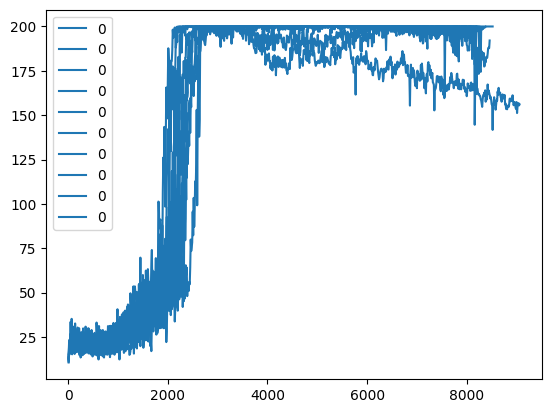

In [3]:
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from agents.dqn import DeepQLearner, DQN
from learning_utils.replay_buffer import ReplayBuffer

# Number of runs to average
num_runs = 10
all_returns = []

for _ in range(num_runs):
    env = VectorizedEnvWrapper(gym.make("CartPole-v0"), num_envs=32)
    agent = DeepQLearner(env, alpha=1e-4, gamma=0.95, epsilon_f=0.05)
    replay_buffer = ReplayBuffer(batch_size=8)
    _, returns = DQN(env, agent, replay_buffer, T=40000)
    all_returns.append(returns)

# Calculate mean and standard deviation of returns
mean_returns = np.mean(all_returns, axis=0)
std_returns = np.std(all_returns, axis=0)

# Time steps for plotting
timesteps = np.arange(len(mean_returns))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(timesteps, mean_returns, label='Average Return')
plt.fill_between(timesteps, mean_returns-std_returns, mean_returns+std_returns, alpha=0.2)
plt.title('Average Returns with Standard Deviation Shadow')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.legend()
plt.show()
